# Web Traffic Time Series Forecasting

### Data Collection and Preparation

In [1]:
import pandas as pd
import numpy as np

In [71]:
# URI-encoding

import urllib.parse

articles = pd.read_csv('wikipedia-articles.csv')
titles = []
titles_encoded = []
for item in articles.values:
    query = item[0].replace('_en.wikipedia.org_desktop_all-agents', '')
    titles.append(query)
    titles_encoded.append(urllib.parse.quote(query))
    
for item in titles:
    print(item)

"Awaken,_My_Love!"
"European_Society_for_Clinical_Investigation"
"Weird_Al"_Yankovic
100_metres
10_Cloverfield_Lane
10_Gigabit_Ethernet
13_Hours:_The_Secret_Soldiers_of_Benghazi
1551
1896_Summer_Olympics
1918_flu_pandemic
1923_San_Pedro_Maritime_Strike
1936_Summer_Olympics
1976_Summer_Olympics
1980_Summer_Olympics
1984_Summer_Olympics
1989_(Taylor_Swift_album)
1999_(Prince_album)
2000_Summer_Olympics
2002_FIFA_World_Cup
2003_invasion_of_Iraq
2007_tuberculosis_scare
2008_Summer_Olympics
2008_Summer_Olympics_medal_table
2012_Benghazi_attack
2012_Summer_Olympics
2012_Summer_Olympics_medal_table
2014_FIFA_World_Cup
2015_NCAA_Men's_Division_I_Basketball_Tournament
2015_San_Bernardino_attack
2015_in_film
2016_Asia_Cup
2016_Berlin_attack
2016_Democratic_National_Convention
2016_European_Men's_Handball_Championship
2016_FIBA_World_Olympic_Qualifying_Tournaments_for_Men
2016_FIFA_Club_World_Cup
2016_FIFA_Futsal_World_Cup
2016_Fort_McMurray_wildfire
2016_Giro_d'Italia
2016_ICC_World_Twenty20
201

In [3]:
import urllib.request

f = open("data.json", "a")

for title in titles:
    url = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia.org/all-access/all-agents/' + title + '/daily/2017010100/2022123100'    
    try:
        page = urllib.request.urlopen(url)
    except:
        f.write('')
    else:
        f.write(page.read().decode() + '\n')

f.close()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [123]:
from datetime import datetime

# Initializing date
first_date = datetime.strptime("01-01-2017", "%d-%m-%Y")
last_date = datetime.strptime("31-12-2022", "%d-%m-%Y")
k = (last_date - first_date).days + 1

date_generated = pd.date_range(test_date, periods=k)
columns = date_generated.strftime("%d-%m-%Y").tolist()

df = pd.DataFrame(index=titles, columns=columns)
df.index.name = 'article'

In [124]:
f = open('data.json', 'r')
articles = f.readlines()

for article in articles:
    d = json.loads(article)
    for item in d.values():
        for i in item:
            date = i['timestamp'][6:8] + '-' + i['timestamp'][4:6] + '-' + i['timestamp'][0:4]
            df.loc[i['article']][date] = i['views']
        
df

,01-01-2017,02-01-2017,03-01-2017,04-01-2017,05-01-2017,06-01-2017,07-01-2017,08-01-2017,09-01-2017,10-01-2017,...,22-12-2022,23-12-2022,24-12-2022,25-12-2022,26-12-2022,27-12-2022,28-12-2022,29-12-2022,30-12-2022,31-12-2022
article,,,,,,,,,,,,,,,,,,,,,
"""Awaken,_My_Love!""",3012,3758,4342,3990,3598,3331,2937,3130,8679,4792,...,402,398,379,369,347,411,428,423,424,424
"""European_Society_for_Clinical_Investigation""",2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,1,NaN,NaN,1,1,NaN
"""Weird_Al""_Yankovic",3063,2827,2724,2574,2690,2758,2685,2782,2603,2544,...,10430,8616,8339,8640,10771,16575,17142,13531,15698,18622
100_metres,972,976,876,981,1016,1005,896,1001,1470,1643,...,1600,1374,1560,2568,1584,1607,1489,1657,1605,1401
10_Cloverfield_Lane,11039,11640,9522,7969,10370,34369,31071,28466,25081,15753,...,1996,2881,2689,2514,3055,3093,3029,2783,2479,2162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zakir_Naik,1932,2357,2212,2168,1986,2143,2088,2221,2078,1955,...,2004,2212,3382,3354,2697,2263,2204,1998,2068,1892
Zayn_Malik,13306,13873,14602,16368,14539,14274,13901,14126,13098,14819,...,6856,6724,7343,7230,6968,7029,7192,7424,8012,7268
Zealandia_(continent),549,628,613,566,603,536,544,624,563,563,...,39,48,42,37,44,48,39,35,30,29


In [126]:
df.to_csv('data.csv')

In [147]:
pd.set_option('display.max_rows', None)

In [148]:
nulls = pd.DataFrame(df.isnull().sum(axis=1))
nulls[nulls[0] != 0]

,0
article,
"""European_Society_for_Clinical_Investigation""",1410
1923_San_Pedro_Maritime_Strike,378
2016_Berlin_attack,4
2016_FIBA_World_Olympic_Qualifying_Tournaments_for_Men,8
2016_North_Korean_nuclear_test,213
AC/DC,2191
Alexandre_Vattemare,56
Alice_Through_the_Looking_Glass_(film),25
Alternative_facts,21


In [7]:
import pandas as pd
import numpy as np

In [109]:
df = pd.read_csv('data.csv', parse_dates = True)
df.head()

,article,01-01-2017,02-01-2017,03-01-2017,04-01-2017,05-01-2017,06-01-2017,07-01-2017,08-01-2017,09-01-2017,...,22-12-2022,23-12-2022,24-12-2022,25-12-2022,26-12-2022,27-12-2022,28-12-2022,29-12-2022,30-12-2022,31-12-2022
0,"""Awaken,_My_Love!""",3012.0,3758.0,4342.0,3990.0,3598.0,3331.0,2937.0,3130.0,8679.0,...,402.0,398.0,379.0,369.0,347.0,411.0,428.0,423.0,424.0,424.0
1,"""European_Society_for_Clinical_Investigation""",2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN
2,"""Weird_Al""_Yankovic",3063.0,2827.0,2724.0,2574.0,2690.0,2758.0,2685.0,2782.0,2603.0,...,10430.0,8616.0,8339.0,8640.0,10771.0,16575.0,17142.0,13531.0,15698.0,18622.0
3,100_metres,972.0,976.0,876.0,981.0,1016.0,1005.0,896.0,1001.0,1470.0,...,1600.0,1374.0,1560.0,2568.0,1584.0,1607.0,1489.0,1657.0,1605.0,1401.0
4,10_Cloverfield_Lane,11039.0,11640.0,9522.0,7969.0,10370.0,34369.0,31071.0,28466.0,25081.0,...,1996.0,2881.0,2689.0,2514.0,3055.0,3093.0,3029.0,2783.0,2479.0,2162.0


In [110]:
df.set_index('article', inplace=True)
df

,01-01-2017,02-01-2017,03-01-2017,04-01-2017,05-01-2017,06-01-2017,07-01-2017,08-01-2017,09-01-2017,10-01-2017,...,22-12-2022,23-12-2022,24-12-2022,25-12-2022,26-12-2022,27-12-2022,28-12-2022,29-12-2022,30-12-2022,31-12-2022
article,,,,,,,,,,,,,,,,,,,,,
"""Awaken,_My_Love!""",3012.0,3758.0,4342.0,3990.0,3598.0,3331.0,2937.0,3130.0,8679.0,4792.0,...,402.0,398.0,379.0,369.0,347.0,411.0,428.0,423.0,424.0,424.0
"""European_Society_for_Clinical_Investigation""",2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN
"""Weird_Al""_Yankovic",3063.0,2827.0,2724.0,2574.0,2690.0,2758.0,2685.0,2782.0,2603.0,2544.0,...,10430.0,8616.0,8339.0,8640.0,10771.0,16575.0,17142.0,13531.0,15698.0,18622.0
100_metres,972.0,976.0,876.0,981.0,1016.0,1005.0,896.0,1001.0,1470.0,1643.0,...,1600.0,1374.0,1560.0,2568.0,1584.0,1607.0,1489.0,1657.0,1605.0,1401.0
10_Cloverfield_Lane,11039.0,11640.0,9522.0,7969.0,10370.0,34369.0,31071.0,28466.0,25081.0,15753.0,...,1996.0,2881.0,2689.0,2514.0,3055.0,3093.0,3029.0,2783.0,2479.0,2162.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zakir_Naik,1932.0,2357.0,2212.0,2168.0,1986.0,2143.0,2088.0,2221.0,2078.0,1955.0,...,2004.0,2212.0,3382.0,3354.0,2697.0,2263.0,2204.0,1998.0,2068.0,1892.0
Zayn_Malik,13306.0,13873.0,14602.0,16368.0,14539.0,14274.0,13901.0,14126.0,13098.0,14819.0,...,6856.0,6724.0,7343.0,7230.0,6968.0,7029.0,7192.0,7424.0,8012.0,7268.0
Zealandia_(continent),549.0,628.0,613.0,566.0,603.0,536.0,544.0,624.0,563.0,563.0,...,39.0,48.0,42.0,37.0,44.0,48.0,39.0,35.0,30.0,29.0


In [111]:
articles = df.index.tolist()
articles

['"Awaken,_My_Love!"',
 '"European_Society_for_Clinical_Investigation"',
 '"Weird_Al"_Yankovic',
 '100_metres',
 '10_Cloverfield_Lane',
 '10_Gigabit_Ethernet',
 '13_Hours:_The_Secret_Soldiers_of_Benghazi',
 '1551',
 '1896_Summer_Olympics',
 '1918_flu_pandemic',
 '1923_San_Pedro_Maritime_Strike',
 '1936_Summer_Olympics',
 '1976_Summer_Olympics',
 '1980_Summer_Olympics',
 '1984_Summer_Olympics',
 '1989_(Taylor_Swift_album)',
 '1999_(Prince_album)',
 '2000_Summer_Olympics',
 '2002_FIFA_World_Cup',
 '2003_invasion_of_Iraq',
 '2007_tuberculosis_scare',
 '2008_Summer_Olympics',
 '2008_Summer_Olympics_medal_table',
 '2012_Benghazi_attack',
 '2012_Summer_Olympics',
 '2012_Summer_Olympics_medal_table',
 '2014_FIFA_World_Cup',
 "2015_NCAA_Men's_Division_I_Basketball_Tournament",
 '2015_San_Bernardino_attack',
 '2015_in_film',
 '2016_Asia_Cup',
 '2016_Berlin_attack',
 '2016_Democratic_National_Convention',
 "2016_European_Men's_Handball_Championship",
 '2016_FIBA_World_Olympic_Qualifying_Tourname

In [112]:
dates = df.columns.tolist()
dates

['01-01-2017',
 '02-01-2017',
 '03-01-2017',
 '04-01-2017',
 '05-01-2017',
 '06-01-2017',
 '07-01-2017',
 '08-01-2017',
 '09-01-2017',
 '10-01-2017',
 '11-01-2017',
 '12-01-2017',
 '13-01-2017',
 '14-01-2017',
 '15-01-2017',
 '16-01-2017',
 '17-01-2017',
 '18-01-2017',
 '19-01-2017',
 '20-01-2017',
 '21-01-2017',
 '22-01-2017',
 '23-01-2017',
 '24-01-2017',
 '25-01-2017',
 '26-01-2017',
 '27-01-2017',
 '28-01-2017',
 '29-01-2017',
 '30-01-2017',
 '31-01-2017',
 '01-02-2017',
 '02-02-2017',
 '03-02-2017',
 '04-02-2017',
 '05-02-2017',
 '06-02-2017',
 '07-02-2017',
 '08-02-2017',
 '09-02-2017',
 '10-02-2017',
 '11-02-2017',
 '12-02-2017',
 '13-02-2017',
 '14-02-2017',
 '15-02-2017',
 '16-02-2017',
 '17-02-2017',
 '18-02-2017',
 '19-02-2017',
 '20-02-2017',
 '21-02-2017',
 '22-02-2017',
 '23-02-2017',
 '24-02-2017',
 '25-02-2017',
 '26-02-2017',
 '27-02-2017',
 '28-02-2017',
 '01-03-2017',
 '02-03-2017',
 '03-03-2017',
 '04-03-2017',
 '05-03-2017',
 '06-03-2017',
 '07-03-2017',
 '08-03-20

In [113]:
df = pd.DataFrame(df.stack())
df

0
article                              
"Awaken,_My_Love!" 01-01-2017  3012.0
                   02-01-2017  3758.0
                   03-01-2017  4342.0
                   04-01-2017  3990.0
                   05-01-2017  3598.0
...                               ...
Zoolander_No._2    26-12-2022     4.0
                   28-12-2022     2.0
                   29-12-2022     1.0
                   30-12-2022     1.0
                   31-12-2022     1.0

[5496613 rows x 1 columns]

In [114]:
idx = df.index
idx.set_names(['article', 'date'], inplace=True)
df

0
article            date              
"Awaken,_My_Love!" 01-01-2017  3012.0
                   02-01-2017  3758.0
                   03-01-2017  4342.0
                   04-01-2017  3990.0
                   05-01-2017  3598.0
...                               ...
Zoolander_No._2    26-12-2022     4.0
                   28-12-2022     2.0
                   29-12-2022     1.0
                   30-12-2022     1.0
                   31-12-2022     1.0

[5496613 rows x 1 columns]

In [115]:
df.rename(columns = {0: 'visitors'}, inplace=True)
df

visitors
article            date                
"Awaken,_My_Love!" 01-01-2017    3012.0
                   02-01-2017    3758.0
                   03-01-2017    4342.0
                   04-01-2017    3990.0
                   05-01-2017    3598.0
...                                 ...
Zoolander_No._2    26-12-2022       4.0
                   28-12-2022       2.0
                   29-12-2022       1.0
                   30-12-2022       1.0
                   31-12-2022       1.0

[5496613 rows x 1 columns]

### AutoRegression Model

In [4]:
!pip install statsmodels --upgrade

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

In [68]:
df_1 = df.loc[articles[300]]
X = df_1.values
X

array([[2.2328e+04],
       [3.6755e+04],
       [4.5734e+04],
       ...,
       [1.3000e+01],
       [1.4000e+01],
       [1.4000e+01]])

<AxesSubplot: xlabel='date'>

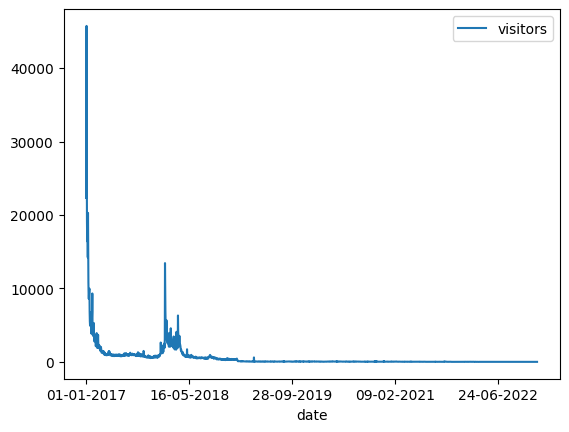

In [69]:
df_1.plot()

In [70]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df_1['visitors'], autolag = 'AIC')

print('ADF: ', dftest[0])
print('P-value: ', dftest[1])
print('No. of Lags: ', dftest[2])
print('No. of observations used for ADF Regression and Critical Values Calculation: ', dftest[3])
print('Critical Values: ')
for key, val in dftest[4].items():
    print('\t', key, ':', val)

ADF:  -6.0710891708226855
P-value:  1.1504064438583997e-07
No. of Lags:  26
No. of observations used for ADF Regression and Critical Values Calculation:  2164
Critical Values: 
	 1% : -3.4333754500434264
	 5% : -2.862876536558312
	 10% : -2.56748150557262


C:\Users\amalc\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


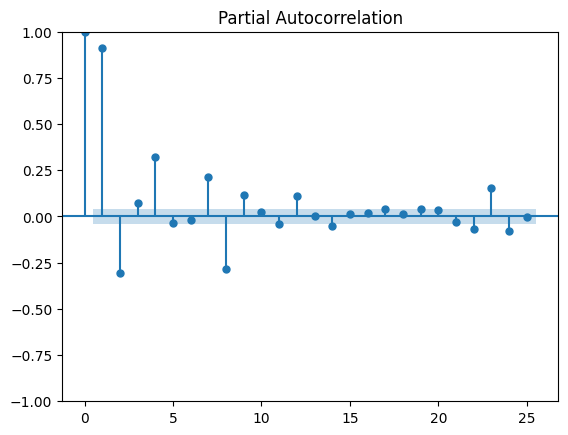

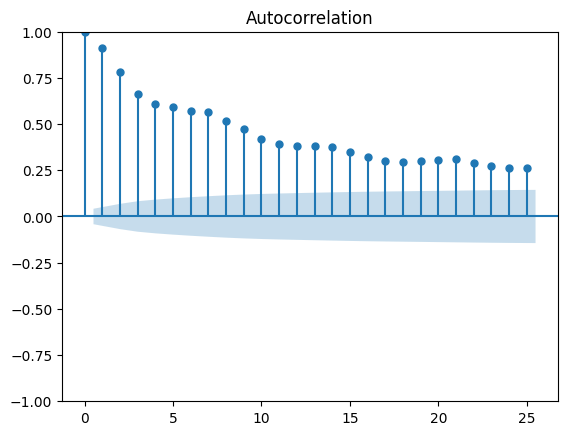

In [71]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

pacf = plot_pacf(df_1['visitors'], lags=25)
acf = plot_acf(df_1['visitors'], lags=25)

In [79]:
train = X[:len(X) - 7]
test = X[len(X) - 7:]

In [80]:
model = AutoReg(train, lags=2).fit()

In [81]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 2184
Model:                     AutoReg(2)   Log Likelihood              -16960.362
Method:               Conditional MLE   S.D. of innovations            574.737
Date:                Wed, 01 Mar 2023   AIC                          33928.724
Time:                        17:05:26   BIC                          33951.476
Sample:                             2   HQIC                         33937.042
                                 2184                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.3263     12.820      4.706      0.000      35.199      85.453
y.L1           0.9655      0.018     53.502      0.000       0.930       1.001
y.L2          -0.1000      0.018     -5.698      0.0

In [82]:
print(len(train))

2184


In [83]:
pred = model.predict(start = len(train), end = len(X) - 1, dynamic = False)

[ 68.01533997 125.09416464 174.29951907 216.0968319  251.52938821
 281.55791019 307.005599  ]


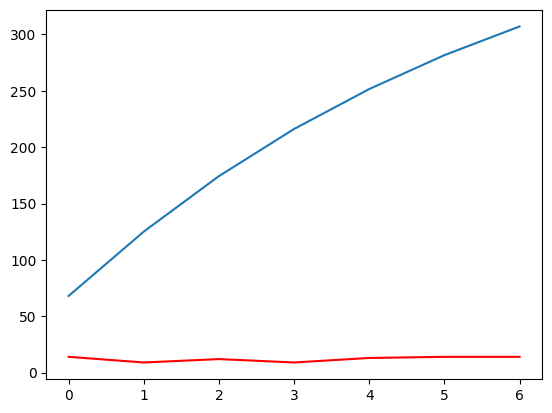

In [84]:
plt.plot(pred)
plt.plot(test, color='red')
print(pred)

In [85]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rmse = sqrt(mean_squared_error(test, pred))
print(rmse)

207.00639364945914


### ARIMA Model

In [87]:
!pip install pmdarima

     -------------------------------------- 568.9/568.9 kB 2.0 MB/s eta 0:00:00
     -------------------------------------- 987.3/987.3 kB 1.7 MB/s eta 0:00:00


In [88]:
import pandas as pd
import numpy as np

In [132]:
df_1 = df.loc[articles[0]]
df_1.index = pd.to_datetime(df_1.index)
df_1

,visitors
date,
2017-01-01,3012.0
2017-02-01,3758.0
2017-03-01,4342.0
2017-04-01,3990.0
2017-05-01,3598.0
...,...
2022-12-27,411.0
2022-12-28,428.0
2022-12-29,423.0


<AxesSubplot: xlabel='date'>

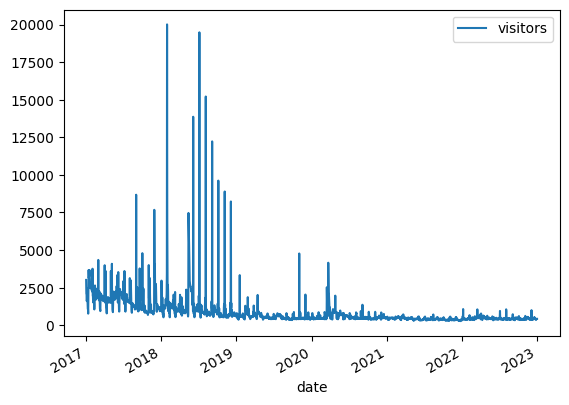

In [133]:
df_1.plot()

In [134]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print('ADF: ', dftest[0])
    print('P-value: ', dftest[1])
    print('No. of Lags: ', dftest[2])
    print('No. of observations used for ADF Regression and Critical Values Calculation: ', dftest[3])
    print('Critical Values: ')
    for key, val in dftest[4].items():
        print('\t', key, ':', val)

In [135]:
ad_test(df_1['visitors'])

ADF:  -8.930420503510105
P-value:  9.849551038565415e-15
No. of Lags:  5
No. of observations used for ADF Regression and Critical Values Calculation:  2185
Critical Values: 
	 1% : -3.4333463382232248
	 5% : -2.86286368244583
	 10% : -2.5674746615942903


In [136]:
from pmdarima import auto_arima

import warnings
warnings.filterwarnings("ignore")

In [137]:
stepwise_fit = auto_arima(df_1['visitors'], trace = True, suppress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=34272.403, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=34533.923, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=34490.412, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=34464.153, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=34531.930, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=34269.657, Time=0.57 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=34365.873, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=34268.712, Time=0.42 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=34269.866, Time=0.75 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=34426.345, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=34268.388, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=34462.159, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=34488.421, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=34269.706, Time=0.31 sec
 ARIMA(1,1,2)(0,0,0

In [138]:
from statsmodels.tsa.arima.model import ARIMA

In [148]:
print(df_1.shape)
train = df_1.iloc[:-30]
test = df_1.iloc[-30:]
print(train.shape, test.shape)

(2191, 1)
(2161, 1) (30, 1)


In [140]:
model = ARIMA(train['visitors'], order = (1, 1, 1))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               visitors   No. Observations:                 2161
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -16911.360
Date:                Wed, 01 Mar 2023   AIC                          33828.719
Time:                        17:33:38   BIC                          33845.753
Sample:                             0   HQIC                         33834.949
                               - 2161                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7420      0.006    131.867      0.000       0.731       0.753
ma.L1         -0.9841      0.006   -168.789      0.000      -0.996      -0.973
sigma2      3.696e+05    942.250    392.220      0.000    3.68e+05    3.71e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.46   Jarque-Bera (JB):          16448481.24
Prob(Q):                              0.50   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                            15.87
Prob(H) (two-sided):                  0.00   Kurtosis:                       429.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [154]:
start = len(train)
end = len(train) + len(test) - 1
pred = model.predict(start = start, end = end, typ = 'levels')
pred_df = pd.DataFrame(pred)
pred_df

,predicted_mean
2161,431.739289
2162,432.287812
2163,432.694794
2164,432.996758
2165,433.220804
2166,433.387036
2167,433.510374
2168,433.601886
2169,433.669784
2170,433.720162


<AxesSubplot: >

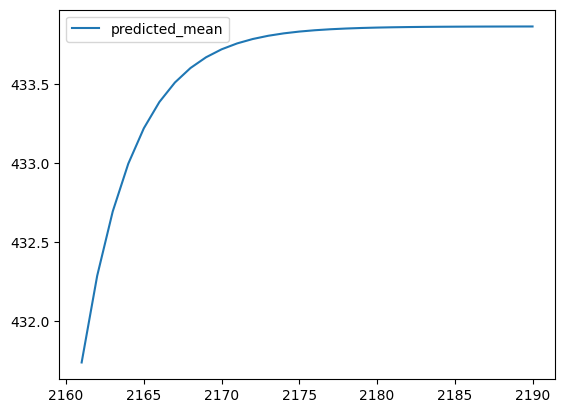

In [145]:
pred.plot(legend = True)
#test['visitors'].plot(legend = True)